In [1]:
import os
from project.cartoonX import CartoonX

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import torch
from torchvision import transforms
import torchvision.models as models
import torch.nn as nn

[W NNPACK.cpp:79] Could not initialize NNPACK! Reason: Unsupported hardware.


 iter 0

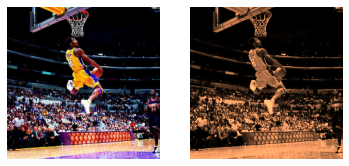

In [2]:
# get device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")                      

# get model to explain
model = models.mobilenet_v3_small(pretrained=True).eval().to(device)

# get image
imgdir = "examples/imgdir"
fname = "kobe2.jpg"
x = Image.open(os.path.join(imgdir, fname))
x = transforms.ToTensor()(x)
x = transforms.Resize(size=(256,256))(x)
x = x.to(device).unsqueeze(0)

# classifiy image
output = model(x)
pred = nn.Softmax(dim=1)(output).max(1)[1].item() 

# set CartoonX hyperparameters
HPARAMS ={"wave": "db3", "mode": "zero", "J": 5,
          "l1lambda": 20, "step_size": 1e-3,
          "num_steps": 2000,  "batch_size": 64,
          "distortion_measure": "label"} 

# get Cartoon RDE 
cartoonX = CartoonX(model=model, device=device, **HPARAMS)
explanation = cartoonX(x, pred)

# plot explanation
fig, axs = plt.subplots(1,2)
axs[0].imshow(np.asarray(transforms.ToPILImage()(x.squeeze(0))),
              vmin=0, vmax=255)
axs[0].axis("off")
axs[1].imshow(np.asarray(transforms.ToPILImage()(explanation.squeeze(0))),
              vmin=0, vmax=255, cmap="copper")
axs[1].axis("off")

plt.show()